# TLab 02 Data Visualization
# I. Thông tin Dataset

## Ngữ cảnh
Tập dữ liệu bán lẻ của một siêu thị toàn cầu trong 4 năm.
## Nguồn gốc
Dataset được lấy từ Kaggle (https://www.kaggle.com/datasets/rohitsahoo/sales-forecasting)
## Nội dung
Tập dữ liệu bao gồm những đơn hàng mua sắm của một siêu thị trong vòng 4 năm.
## License
[GPL 2](https://www.gnu.org/licenses/old-licenses/gpl-2.0.en.html)


## Phương pháp thu thập

# II. Khám phá dữ liệu:

### Import thư viện cần thiết

Trước hết, import các thư viện cần thiết cho việc khám phá, xử lý và phân tích trở nên dễ dàng hơn.

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

### Đọc dataset từ file csv
Đọc dữ liệu từ file `train.csv` được cung cấp

In [62]:
raw_data = pd.read_csv('../data/train.csv')

### In 5 dòng đầu tiên của dataset

In [63]:
raw_data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


### Số dòng và cột của dataset:

In [64]:
raw_data.shape

(9800, 18)

Như vậy bộ dữ liệu của chúng ta có 9800 dòng và 18 cột

### Ý nghĩa của mỗi dòng và cột
- Mỗi dòng mang ý nghĩa là những thông tin của mỗi một món hàng được bán đi. Vì mỗi dòng mang thông tin của một món hàng khác nhau nên không có vấn đề nếu các dòng có ý nghĩa khác.
- Mỗi cột là những thuộc tính của đơn hàng như mã ID, Ngày nhận đơn, mã khách hàng và phân loại

### Các cột của dataset

In [65]:
np.array(raw_data.columns)

array(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City',
       'State', 'Postal Code', 'Region', 'Product ID', 'Category',
       'Sub-Category', 'Product Name', 'Sales'], dtype=object)

### Ý nghĩa của các cột

- `Row ID`: Số thứ tự của các món hàng
- `Order ID`: Mã đơn hàng
- `Order Date`: Ngày đặt hàng
- `Ship Date`: Ngày giao hàng
- `Ship Mode`: Số lượng xi lanh của động cơ xe
- `Customer ID`: Mã khách hàng
- `Customer Name`: Tên khách hàng
- `Segment`: Phân khúc thị trường
- `Country`: Quốc gia đơn hàng cần giao tới
- `City`: Thành phố đơn hàng cần giao tới
- `State`: Bang đơn hàng cần giao tới
- `Postal Code`: Mã bưu điện
- `Region`: Khu vực (Bắc, Nam, Tây, Đông hoặc Trung tâm)
- `Product ID`: Mã của món hàng
- `Category`: Doanh mục của món hàng
- `Sub-Category`: Doanh mục phụ của món hàng
- `Product Name`: Tên món hàng
- `Sales`: Đơn giá

### Kiểm tra sự trùng lắp giữa các dòng

In [66]:
raw_data.duplicated().sum()

0

Như vậy dữ liệu của chúng ta không có sự trùng lắp giữa các dòng

### Kiểu dữ liệu của các cột

In [67]:
raw_data.dtypes

Row ID             int64
Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Postal Code      float64
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
dtype: object

### Các cột đã mang kiểu dữ liệu hợp lý chưa?

- Chưa, các cột Order Date mà Ship Date phải được chuyển về kiểu datetime
- Các cột Row ID và Postal Code phải được chuyển về kiểu Catelogical


In [68]:
# chuyển các cột 'Date' sang kiểu dữ liệu datetime
date_col = ['Order Date', 'Ship Date']
for col in date_col:
    raw_data[col] = pd.to_datetime(raw_data[col], format='%d/%m/%Y')

In [69]:
# Chuyển cột 'Postal Code' và 'Row ID' sang kiểu dữ liệu object
raw_data['Postal Code'] = raw_data['Postal Code'].astype('object')
raw_data['Row ID'] = raw_data['Row ID'].astype('object')

In [70]:
raw_data.dtypes

Row ID                   object
Order ID                 object
Order Date       datetime64[ns]
Ship Date        datetime64[ns]
Ship Mode                object
Customer ID              object
Customer Name            object
Segment                  object
Country                  object
City                     object
State                    object
Postal Code              object
Region                   object
Product ID               object
Category                 object
Sub-Category             object
Product Name             object
Sales                   float64
dtype: object

### Sự phân bố của các cột Categorical
Các cột Categorical trong Dataset gồm:
- `drive`
- `transmission`
- `fuel_type_1`

In [71]:
category_columns = raw_data.select_dtypes(include=['object']).columns.tolist()
raw_data[category_columns].head()

,Row ID,Order ID,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name
0,1,CA-2017-152156,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase
1,2,CA-2017-152156,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,..."
2,3,CA-2017-138688,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...
3,4,US-2016-108966,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table
4,5,US-2016-108966,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System


Kiểm tra missing values của các cột `Categorical`:

In [72]:
raw_data[category_columns].isnull().mean()

Row ID           0.000000
Order ID         0.000000
Ship Mode        0.000000
Customer ID      0.000000
Customer Name    0.000000
Segment          0.000000
Country          0.000000
City             0.000000
State            0.000000
Postal Code      0.001122
Region           0.000000
Product ID       0.000000
Category         0.000000
Sub-Category     0.000000
Product Name     0.000000
dtype: float64

Như vậy tỷ lệ missing values chỉ có ở cột Postal code với tỉ lệ rất nhỏ. Nhưng mã bưu điện của một thành phố ta có thể tìm kiếm trên Google.

Ta hãy kiểm tra xem những thành phố nào mà đơn hàng bị thiếu mã bưu điện

In [73]:
raw_data[raw_data['Postal Code'].isnull()]['City'].unique()

array(['Burlington'], dtype=object)

Chỉ có một thành phố duy nhất bị thiếu mã bưu điện là Burlinton, ta tìm kiếm thì thấy mã bưu điện của nó là `05401`
Thay thế nó vào các cột còn thiếu

In [74]:
raw_data['Postal Code'][raw_data['City'] == 'Burlington'] = 5401

C:\Users\duypr\AppData\Local\Temp\ipykernel_26404\256702386.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Kiểm tra lại missing values của các cột `Categorical`:

In [75]:
raw_data[category_columns].isnull().mean()

Row ID           0.0
Order ID         0.0
Ship Mode        0.0
Customer ID      0.0
Customer Name    0.0
Segment          0.0
Country          0.0
City             0.0
State            0.0
Postal Code      0.0
Region           0.0
Product ID       0.0
Category         0.0
Sub-Category     0.0
Product Name     0.0
dtype: float64

### Phân phối của các cột Categorical

In [76]:
def num_values(x):
    return x.nunique()
def value_ratios(x):
    return (x.value_counts(normalize=True)*100).to_dict()

In [77]:
raw_data[category_columns].agg([num_values, value_ratios])

,Row ID,Order ID,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name
num_values,9800,4922,4,793,793,3,1,529,49,625,4,1861,3,17,1849
value_ratios,"{1: 0.010204081632653062, 6537: 0.010204081632...","{'CA-2018-100111': 0.14285714285714285, 'CA-20...","{'Standard Class': 59.785714285714285, 'Second...","{'WB-21850': 0.35714285714285715, 'PP-18955': ...","{'William Brown': 0.35714285714285715, 'Paul P...","{'Consumer': 52.05102040816326, 'Corporate': 3...",{'United States': 100.0},"{'New York City': 9.091836734693876, 'Los Ange...","{'California': 19.857142857142858, 'New York':...","{10035.0: 2.5816326530612246, 10024.0: 2.29591...","{'West': 32.04081632653061, 'East': 28.4183673...","{'OFF-PA-10001970': 0.19387755102040816, 'TEC-...","{'Office Supplies': 60.295918367346935, 'Furni...","{'Binders': 15.224489795918366, 'Paper': 13.65...","{'Staple envelope': 0.4795918367346939, 'Stapl..."


### Sự phân phối của các cột Numeric

In [78]:
num_col_info_df = raw_data.select_dtypes(include=['int64', 'float64'])
def missing_ratio(x):
    return x.isna().mean()*100
def lower_quartile(x):
    return x.quantile(0.25)
def median(x):
    return x.quantile(0.5)
def upper_quartile(x):
    return x.quantile(0.75)

In [79]:
num_col_info_df = num_col_info_df.agg([missing_ratio, "min", lower_quartile, median, upper_quartile, "max"])
num_col_info_df = num_col_info_df.round(1)
num_col_info_df

,Sales
missing_ratio,0.0
min,0.4
lower_quartile,17.2
median,54.5
upper_quartile,210.6
max,22638.5


#### Nhận xét:
Hầu như tất cả các cột numeric đều không có missing values.

### Vẽ biểu đồ để xem sự phân bố dữ liệu của cột sale

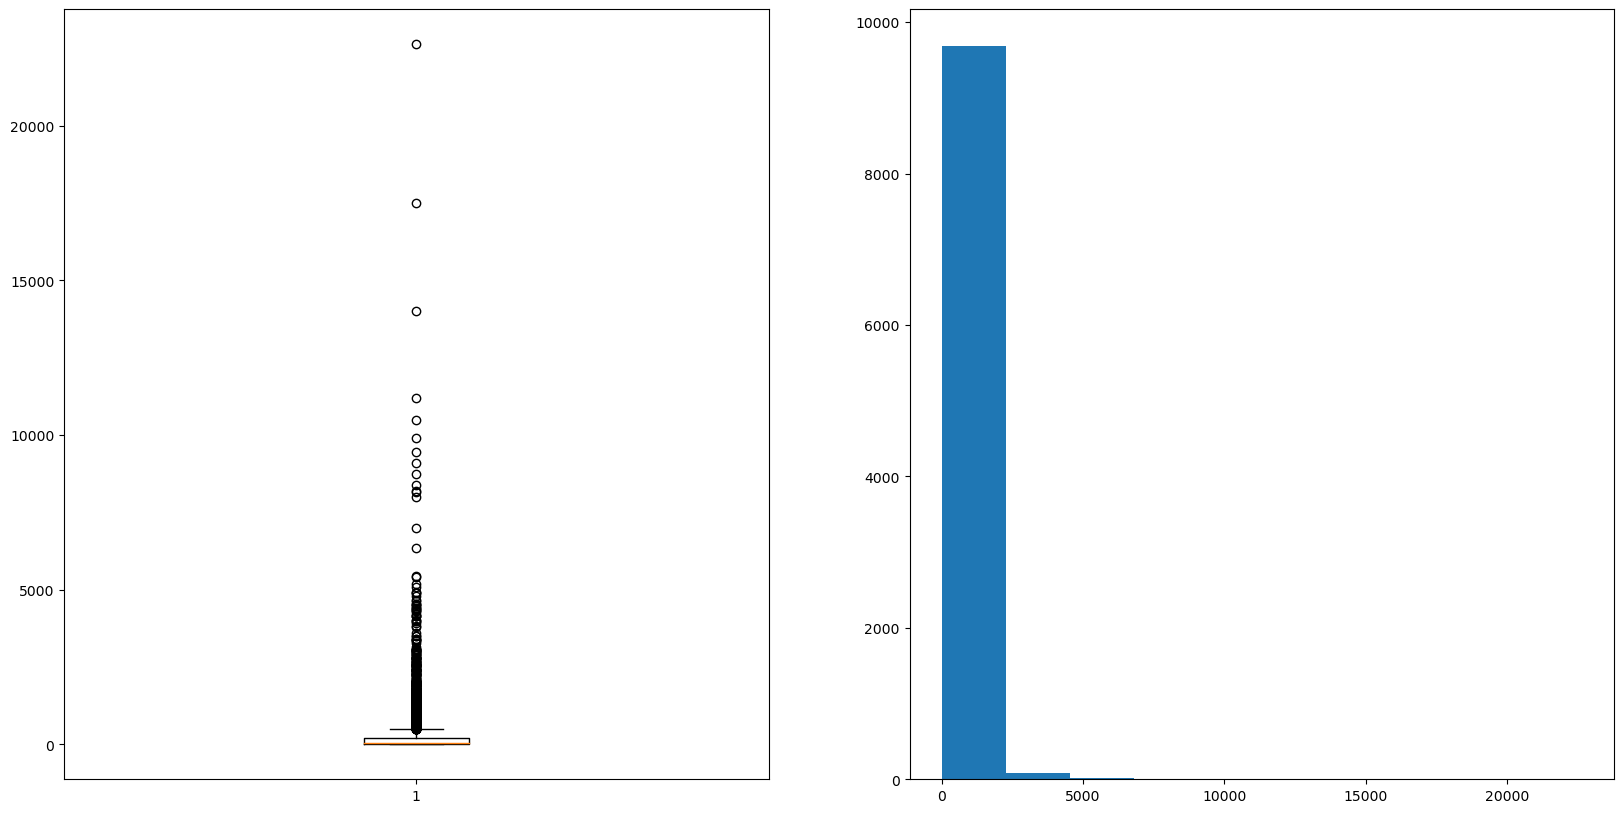

In [80]:
plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
plt.boxplot(raw_data['Sales'])
plt.subplot(1, 2, 2)
plt.hist(raw_data['Sales'])
plt.show()

#### Nhận xét:

Các cột có rất nhiều ouliner. Vì đây là bộ dữ liệu thực, nên ta không bỏ các outliner này

### Thêm các cột thời gian để tiện cho việc khám phá các mối quan hệ

In [81]:
raw_data['Day of Week'] = raw_data['Order Date'].dt.day_name()
raw_data['Week of Year'] = raw_data['Order Date'].dt.isocalendar().week
raw_data['order_day'] = raw_data['Order Date'].dt.day
raw_data['ship_day'] = raw_data['Ship Date'].dt.day
raw_data['order_year'] = raw_data['Order Date'].dt.year
raw_data['ship_year'] = raw_data['Ship Date'].dt.year
raw_data['Fulfillment_Time'] = raw_data['Ship Date'] - raw_data['Order Date']
raw_data['Fulfillment_Time'] = raw_data['Fulfillment_Time'].dt.days

### Khám phá mối quan hệ trong dữ liệu

#### Tổng doanh thu theo từng tháng

In [82]:
raw_data.sort_values(by='Order Date', ascending=True, inplace=True)
raw_data.set_index('Order Date', inplace=True)

In [83]:
total_sales=raw_data[['Sales']]
monthly_sales=total_sales.resample('m').sum()
monthly_sales.head()

,Sales
Order Date,
2015-01-31,14205.707
2015-02-28,4519.892
2015-03-31,55205.797
2015-04-30,27906.855
2015-05-31,23644.303


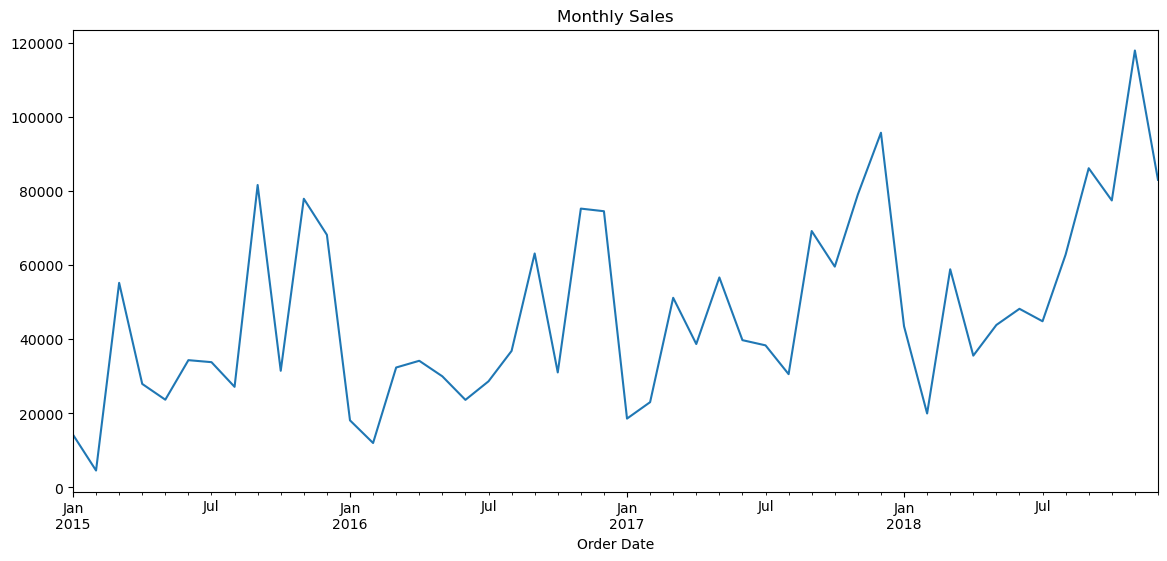

In [84]:
monthly_sales['Sales'].plot(figsize=(14,6))
plt.title('Monthly Sales')
plt.show()

Nhận xét
- Doanh số bán hàng của cửa hàng không có tính lặp lại trong một vài thời điểm trong năm nhưng lại có xu hướng ngày càng tăng

#### Doanh số bán hàng theo từng danh mục

In [85]:
prod = raw_data[['Category', 'Sub-Category', 'Sales', 'order_year']]
fig = px.sunburst( prod, path=['Category', 'Sub-Category'], 
                values='Sales',
                color='Category',
                title="Phân tích doanh số theo danh mục và danh mục phụ",
                width=800, height=800
)
fig.show()

Nhận xét:
- Doanh thu của các doanh mục sản phẩm rất đồng điều, không có sự chênh lệch cao

**Doanh số theo từng doanh mục theo từng năm**

In [86]:
cats_sales = raw_data.groupby(['Category', 'order_year'])['Sales'].sum()
fig = px.bar(cats_sales.reset_index(), x='Category', y='Sales', color='order_year', barmode='group', title='Doanh số theo danh mục và năm')
fig.show()

**Nhận xét**
- Các đơn hàng công nghệ ngày càng có xu hướng được mua nhiều hơn từ giai đoạn năm 2016 trở đi.
- Các đơn hàng Nội thất và Văn phòng phẩm có doanh thu không biến động nhiều theo từng năm.

**Thời gian hoàn thành đơn hàng của các doanh mục**

In [87]:
fullfillment_time = raw_data.groupby('Category')['Fulfillment_Time'].mean().sort_values(ascending=True).reset_index()

fig = px.line(fullfillment_time, x='Category', y='Fulfillment_Time', title='Thời gian xử lý đơn hàng trung bình theo danh mục')
fig.show()

**Nhận xét**

Các đơn hàng Nội thất được hoàn thành đơn hàng sớm nhất, sau đó tới các đơn hàng Công nghệ và cuối cùng là các đơn hàng văn phòng phẩm

**Thời gian hoàn thành đơn hàng trung bình theo từng năm**

In [88]:
yearly_stats = raw_data.groupby('order_year')['Fulfillment_Time'].mean()

fig = px.line(yearly_stats.reset_index(), x='order_year', y='Fulfillment_Time', title='Thời gian xử lý đơn hàng trung bình theo năm')
fig.show()

**Nhận xét**
- Thời giang xử lý đơn hàng trung bình càng ngày càng có xu hướng tăng lên. Có thể là do số lượng đơn hàng tăng lên.

### Xây dựng mô hình Time series

In [89]:
from statsmodels.tsa.stattools import adfuller
ad_test=adfuller(monthly_sales['Sales'])
print(f'p-value: {ad_test[1]}')
if ad_test[1] < 0.05:
    print('we reject the null hypothesis, Data is stationary')
else:
    print('we fail to reject the null hypothesis, Data is non-stationary')

p-value: 0.0002779103927667023
we reject the null hypothesis, Data is stationary


c:\Users\duypr\.conda\envs\min_ds-env\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning:

The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.



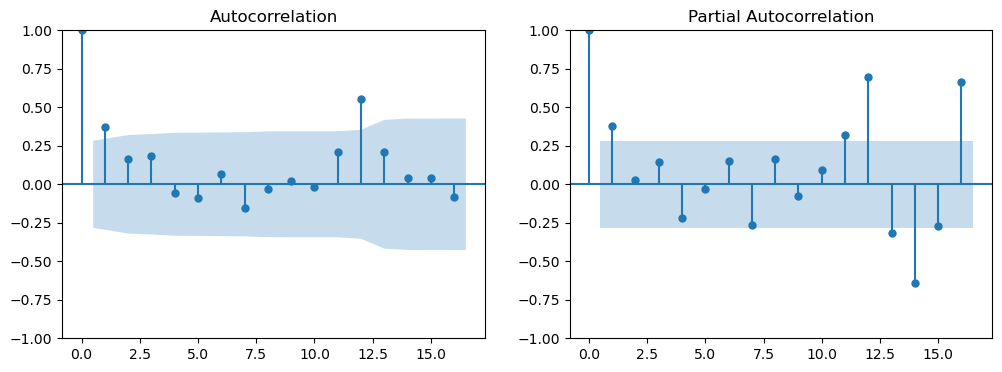

In [90]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
fig=plt.figure(figsize=(12,4))
ax1=fig.add_subplot(121)
fig=plot_acf(monthly_sales['Sales'].dropna(), lags=16, ax=ax1)
ax2=fig.add_subplot(122)
fig=plot_pacf(monthly_sales['Sales'].dropna(), lags=16, ax=ax2)
plt.show()

In [91]:
X=monthly_sales[['Sales']]
X_train=X[:-7]

In [108]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
sr_model = SARIMAX(monthly_sales['Sales'],order=(1,1,1),seasonal_order=(1,1,1,12))
fitted_model = sr_model.fit()

c:\Users\duypr\.conda\envs\min_ds-env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning:

Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.



<AxesSubplot:xlabel='Order Date'>

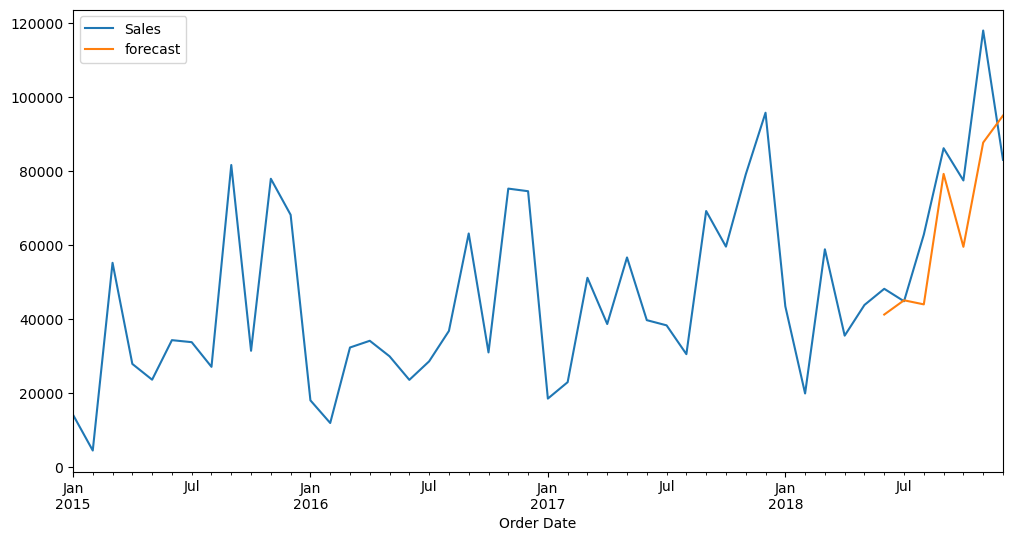

In [116]:
monthly_sales['forecast']=fitted_model.predict(start=-7, end=-1, dynamic=True)
monthly_sales[['Sales', 'forecast']].plot(figsize=[12,6])

In [117]:
monthly_sales.tail()

,Sales,forecast
Order Date,,
2018-08-31,62837.8480,43985.574006
2018-09-30,86152.8880,79226.257692
2018-10-31,77448.1312,59528.817852
2018-11-30,117938.1550,87682.752270
2018-12-31,83030.3888,94962.964796


In [118]:
data={'date': ['2019-01-31', '2019-02-28','2019-03-31', '2019-4-30', '2019-05-31', '2019-06-30', '2019-07-31']}
future_dates = pd.DataFrame(data)
future_dates['datetime'] = future_dates['date'].astype('datetime64[ns]')
future_dates.drop('date', axis=1, inplace=True)
future_dates.set_index('datetime', inplace=True)
future_dates

""
datetime
2019-01-31
2019-02-28
2019-03-31
2019-04-30
2019-05-31
2019-06-30
2019-07-31


In [119]:
future_df = pd.concat([monthly_sales, future_dates])
future_df.tail(10)

,Sales,forecast
2018-10-31,77448.1312,59528.817852
2018-11-30,117938.1550,87682.752270
2018-12-31,83030.3888,94962.964796
2019-01-31,NaN,NaN
2019-02-28,NaN,NaN
2019-03-31,NaN,NaN
2019-04-30,NaN,NaN
2019-05-31,NaN,NaN
2019-06-30,NaN,NaN
2019-07-31,NaN,NaN


In [120]:
future_forecast = fitted_model.get_forecast(steps=7)
forecast_values = future_forecast.predicted_mean
forecast_values

2019-01-31    43492.278962
2019-02-28    34805.105242
2019-03-31    69907.412186
2019-04-30    54056.962681
2019-05-31    62749.314946
2019-06-30    60785.067613
2019-07-31    59373.127426
Freq: M, Name: predicted_mean, dtype: float64

In [121]:
future_df['future_forecast'] = forecast_values
future_df.tail(10)

,Sales,forecast,future_forecast
2018-10-31,77448.1312,59528.817852,NaN
2018-11-30,117938.1550,87682.752270,NaN
2018-12-31,83030.3888,94962.964796,NaN
2019-01-31,NaN,NaN,43492.278962
2019-02-28,NaN,NaN,34805.105242
2019-03-31,NaN,NaN,69907.412186
2019-04-30,NaN,NaN,54056.962681
2019-05-31,NaN,NaN,62749.314946
2019-06-30,NaN,NaN,60785.067613
2019-07-31,NaN,NaN,59373.127426


#### Vẽ biểu đồ dự báo doanh thu trong tương lai

<AxesSubplot:>

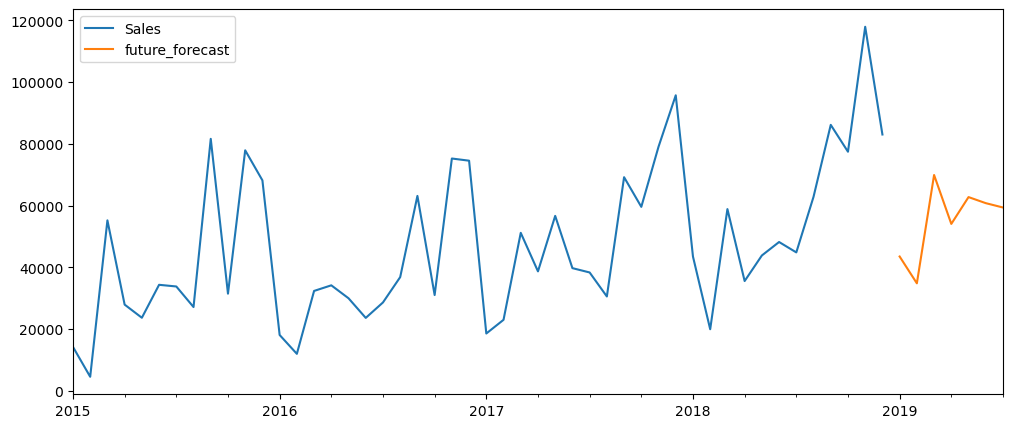

In [122]:
future_df[['Sales', 'future_forecast']].plot(figsize=(12, 5))